<a href="https://colab.research.google.com/github/dandamudi-geeta/Deep-Learning/blob/main/2348512_DL(CIA_Component2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1st Question**

In [63]:
# Define the cost function and delivery time function
def cost_function(s, d):
    return 0.1 * s**2 + 0.5 * d

In [64]:
def delivery_time_function(s, d):
    return d/s + 0.1*d

In [67]:
# Initialize speed, distance, and momentum

s = 50  #m/s
d = 100
momentum = 0.9
learning_rate = 0.01

In [81]:
# Perform 2 iterations of SGD with momentum
for i in range(2):
  # Calculate gradients
    gradient_s = 0.2 * s
    gradient_d = 0.5


# Compute the current delivery time
current_delivery_time = delivery_time_function(s, d)
gradient_delivery_time_s = -d/s**2
gradient_delivery_time_d = 1/s + 0.1


# Initialize deltas
delta_s = 0
delta_d = 0


# Update speed and distance using momentum
delta_s = momentum * delta_s + learning_rate * gradient_s
delta_d = momentum * delta_d + learning_rate * gradient_d
s -= delta_s
d -= delta_d

print(f'Iteration {i+1}: Speed = {s}, Distance = {d}')

Iteration 2: Speed = 49.7005996, Distance = 99.98500000000001


In [69]:
# Perform 3 iterations of SGD with momentum
for i in range(3):
  # Calculate gradients
    gradient_s = 0.2 * s
    gradient_d = 0.5

In [74]:
# Compute the current delivery time
current_delivery_time = delivery_time_function(s, d)
gradient_delivery_time_s = -d/s**2
gradient_delivery_time_d = 1/s + 0.1

In [78]:
# Initialize deltas
delta_s = 0
delta_d = 0

In [79]:
# Update speed and distance using momentum
delta_s = momentum * delta_s + learning_rate * gradient_s
delta_d = momentum * delta_d + learning_rate * gradient_d
s -= delta_s
d -= delta_d

print(f'Iteration {i+1}: Speed = {s}, Distance = {d}')

Iteration 3: Speed = 49.9, Distance = 99.995


**2nd Question:**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("/content/GME_stock.csv")

In [24]:
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


**Data Preprocessing**

In [25]:
df.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [26]:
df.shape

(4773, 7)

In [27]:
df.sample(10)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
3966,2005-04-27,12.190000,12.270000,12.005000,12.235000,1607400.0,8.237825
2045,2012-12-12,27.809999,28.190001,27.730000,27.830000,2769500.0,19.445877
2166,2012-06-19,18.340000,18.660000,18.260000,18.370001,3630200.0,12.549054
1014,2017-01-18,23.299999,23.620001,22.900000,23.490000,2180900.0,19.102865
4208,2004-05-11,8.725000,8.850000,8.675000,8.750000,572600.0,5.891375
2560,2010-11-24,20.350000,20.500000,20.160000,20.350000,1868800.0,13.701655
3313,2007-11-29,56.590000,56.590000,54.400002,55.860001,2352500.0,37.610546
2879,2009-08-20,23.240000,24.100000,23.010000,23.410000,16863200.0,15.761954
4591,2002-10-31,9.075000,9.075000,8.900000,8.950000,411000.0,6.026036
4380,2003-09-04,8.800000,9.125000,8.750000,8.990000,814800.0,6.052968


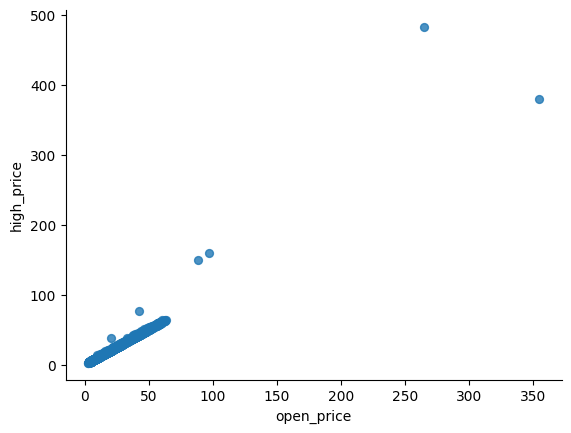

In [28]:
# @title open_price vs high_price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='open_price', y='high_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Splitting the Data**

**Train and Test the Data**

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values


In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [206]:
#Reshape
X_train = np.array(X_train).reshape(-1, 1)

In [207]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

**Relu Activation Function**

In [208]:
def create_regularized_model(regularizer):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizer),
        Dense(32, activation='relu', kernel_regularizer=regularizer),
        Dense(1, activation='sigmoid')
    ])
    return model

In [209]:
# Baseline DNN architecture
model_baseline = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_baseline = model_baseline.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))


ValueError: Data cardinality is ambiguous:
  x sizes: 0
  y sizes: 8
Make sure all arrays contain the same number of samples.

In [210]:
train_acc = model.evaluate(X_train, Y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, Y_test, verbose=0)[1]

ValueError: Data cardinality is ambiguous:
  x sizes: 0
  y sizes: 8
Make sure all arrays contain the same number of samples.

In [211]:
print(f"Regularization Type: {reg_type}")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()

Regularization Type: l1
Train Accuracy: 0.0000
Test Accuracy: 0.0000

